## Experimento para ver el efecto de una capa POOL 

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

## Dataset: Fashion Mnist

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset que consiste de 60,000 imágenes de entrenamiento en blanco y negro catalogadas en 10 categorías y un test set de 10,000 imágenes. Los labels/rótulos son:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover 
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

### Para importar
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Retorna:
2 tuplas:
1. x_train, x_test: array de uint8 de imágenes blanco y negro de dimensiones (num_samples, 28, 28)
2. y_train, y_test: array de uint8 d rótulos (enteros en el rango range 0-9) con dimensiones (num_samples,).

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Redimensionamos los datos

In [ ]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### Normalización

In [ ]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Dividimos los datos en datasets de entrenamiento/validación/test

In [ ]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Arquitectura con Pooling vs sin Pooling

![image.png](attachment:image.png)

### Pooling vs No Pooling

In [ ]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
# Agregamos una capas más
model_a.add(keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
# Fin agregado
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

# el segundo modelo no tiene Max Pool, notar que strides = 2 en la capa convolucional para que los dos modelos tengan
# la misma cantidad de parámetros
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=2, padding='valid', activation='relu', input_shape=(28, 28, 1)))
# Agregamos una capas más
model_b.add(keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
# Fin agregado
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [ ]:
model_a.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_25 (Dense)             (None, 100)             

In [ ]:
model_b.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 16)        4624      
_________________________________________________________________
flatten_9 (Flatten)          (None, 1936)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 300)               581100    
_________________________________________________________________
dense_28 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1010      
Total params: 617,154
Trainable params: 617,154
Non-trainable params: 0
_______________________________________________

In [ ]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_history_a = model_a.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 32s 37ms/step - loss: 1.1225 - accuracy: 0.5876 - val_loss: 0.7314 - val_accuracy: 0.7134
Epoch 2/3
860/860 [==============================] - 32s 37ms/step - loss: 0.6633 - accuracy: 0.7515 - val_loss: 0.7719 - val_accuracy: 0.7322
Epoch 3/3
860/860 [==============================] - 32s 37ms/step - loss: 0.5729 - accuracy: 0.7846 - val_loss: 0.5200 - val_accuracy: 0.8110


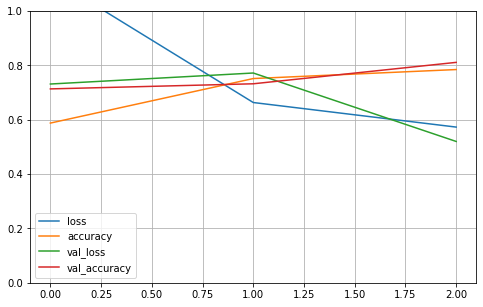

In [ ]:
import pandas as pd

pd.DataFrame(model_history_a.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
ev = model_a.evaluate(X_test_n, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.5744 - accuracy: 0.7824


In [ ]:
X_new = X_test[:3]

In [ ]:
y_pred = model_a.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [ ]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


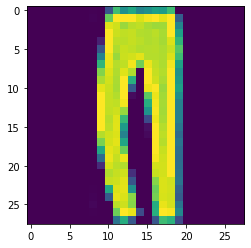

In [ ]:
print(plt.imshow(X_test[2].reshape((28,28))))

In [ ]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 23s 26ms/step - loss: 1.0461 - accuracy: 0.6296 - val_loss: 0.6727 - val_accuracy: 0.7394
Epoch 2/3
860/860 [==============================] - 23s 26ms/step - loss: 0.5642 - accuracy: 0.7893 - val_loss: 0.6607 - val_accuracy: 0.7494
Epoch 3/3
860/860 [==============================] - 23s 27ms/step - loss: 0.4950 - accuracy: 0.8191 - val_loss: 0.4480 - val_accuracy: 0.8442


In [ ]:
ev = model_b.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4896 - accuracy: 0.8224


**NOTA:** Sigue dando mejor el modelo b sin pooling. Le fui tocando algunas cosas pero no logro que se invierta. Seguramente me falta tocar algún hiperparámetro.